# Project :Disaster-Tweet

    The propose of this notebook is to create a NLP model which classifies the tweet into two part:
    * Disaster-tweet :
                All the tweet which contains information about the natural disaster happening around the globe will be                         classified as disaster tweet
    * Non-disaster tweet :
                Except disaster tweet all remaining other tweets is classified as non-disaster tweet

## Importing all needed module

In [1]:
import tensorflow as tf
import pandas as pd
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

## Setting up my own helper module

In [4]:
!wget https://raw.githubusercontent.com/PJ-BN/Helper-module/main/helperfunc.py

--2023-02-23 16:37:03--  https://raw.githubusercontent.com/PJ-BN/Helper-module/main/helperfunc.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10449 (10K) [text/plain]
Saving to: 'helperfunc.py.1'

     0K ..........                                            100%  621K=0.02s

2023-02-23 16:37:03 (621 KB/s) - 'helperfunc.py.1' saved [10449/10449]



In [2]:
from helperfunc import calculate_results

## Get the data

In [3]:
data_dir ="C:\\Users\\USER\\Documents\\ML\\NLP\\disaster\\src\\disaster-tweet\\"
train_data_dir = data_dir + "train.csv"
test_data_dir = data_dir + "test.csv"

## Visualizing the data

In [58]:
train_data = pd.read_csv(train_data_dir )
test_data = pd.read_csv(test_data_dir)                         

train_data = train_data.fillna("none")  
test_data = test_data.fillna("none")  

train_data.head()


,id,keyword,location,text,target
0,1,none,none,Our Deeds are the Reason of this #earthquake M...,1
1,4,none,none,Forest fire near La Ronge Sask. Canada,1
2,5,none,none,All residents asked to 'shelter in place' are ...,1
3,6,none,none,"13,000 people receive #wildfires evacuation or...",1
4,7,none,none,Just got sent this photo from Ruby #Alaska as ...,1


In [59]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [60]:
train_data["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [61]:
train_text = train_data["text"]
train_label = train_data["target"]
train_location = train_data["location"]
train_keyword = train_data["keyword"]

test_text = test_data["text"]
test_location = test_data["location"]
test_keyword = test_data["keyword"]

In [62]:
test_data.head()

,id,keyword,location,text
0,0,none,none,Just happened a terrible car crash
1,2,none,none,"Heard about #earthquake is different cities, s..."
2,3,none,none,"there is a forest fire at spot pond, geese are..."
3,9,none,none,Apocalypse lighting. #Spokane #wildfires
4,11,none,none,Typhoon Soudelor kills 28 in China and Taiwan


In [63]:
import random

random.choices(train_text, k =10)

['Cameroon Repatriated 12000 Nigerian Refugees http://t.co/6nQRU2q5Tz',
 'like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit',
 "I'm on 2 blood pressure meds and it's still probably through the roof! Long before the #PPact story broke I was involved in animal rescue",
 'This fire is WAY too close wtf is going on ???? http://t.co/drf3mmRbyx',
 'New Giant Flames (GIANT FULL BLACK PANTOFEL) info/order sms:087809233445 pin:23928835 http://t.co/dthNEezupe  pic.twitter.com/pNPiZoDY',
 'Zimbabwe is a country with a collapsed government ruled by a dictator while many live below the poverty line.',
 'Look at the previous battles. Citizens were committing suicide so to not be under American control. The bomb was the only way. @NBCNews',
 '3 Options To Fix Your Facebook Cover Violation http://t.co/pF8dXwIbDp and Keep the #Facebook Police away. #socialmedia #strategy',
 'Passengers evacuated &amp; lanes blocked off as power

In [64]:
plt_list = []
leng = 0
for text in train_text:
    plt_list.append(len(text))
    leng =leng + len(text)

leng/len(train_text)

101.03743596479706

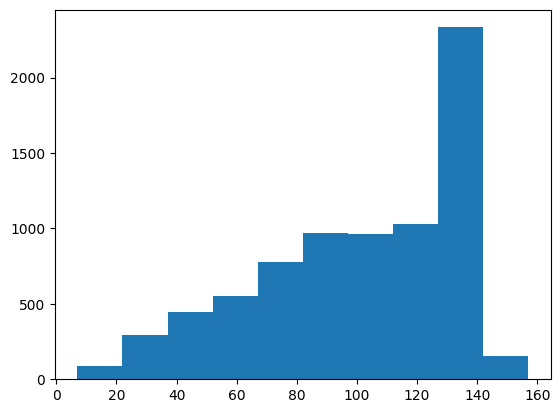

In [65]:
plt.hist(plt_list);

In [66]:
random.choices(train_location , k = 10)

['Pittsburgh ',
 'none',
 'Miami Beach, Fl',
 'none',
 'Charlotte NC',
 'Bend, Oregon',
 'Anderson, SC',
 'Los Angeles, CA',
 'United Kingdom',
 'none']

In [67]:
random.choices(train_keyword, k = 10)

['attack',
 'structural%20failure',
 'whirlwind',
 'heat%20wave',
 'twister',
 'airplane%20accident',
 'devastation',
 'typhoon',
 'harm',
 'disaster']

In [68]:
max_vocab = 10000
output_length = 150

text_vector = layers.TextVectorization(max_tokens = max_vocab , output_sequence_length=output_length )

text_embed = layers.Embedding(max_vocab, 128, mask_zero=True)

text_vector.adapt(train_text)

In [69]:
train_sentences, val_sentences , train_target , val_target = train_test_split(
                                                                train_text,
                                                                train_label,
                                                                test_size = 0.3,
                                                                random_state = 42)

## Creating a dataset for the module

In [70]:
train_dataset_0 = tf.data.Dataset.from_tensor_slices((train_sentences, train_target))
val_dataset_0 = tf.data.Dataset.from_tensor_slices((val_sentences, val_target))


train_dataset_0 = train_dataset_0.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset_0 = val_dataset_0.batch(32).prefetch(tf.data.AUTOTUNE)


In [71]:
train_dataset_0

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [72]:
train_dataset_0.element_spec

(TensorSpec(shape=(None,), dtype=tf.string, name=None),
 TensorSpec(shape=(None,), dtype=tf.int64, name=None))

## Creating our first model using simple CNN method

In [19]:
inputs = layers.Input(shape = (1,) , dtype = tf.string)

x = text_vector(inputs)
x = text_embed(x)

x = layers.Conv1D(64, 2, activation = "tanh")(x)


x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64 , activation = "tanh")(x)
x = layers.Dense(64, activation = "tanh")(x)

outputs = layers.Dense(1, activation = "sigmoid")(x)

model_0 = tf.keras.Model(inputs , outputs)

model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 150)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 150, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 149, 64)           16448     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                4160  

In [20]:
model_0.compile(loss = "binary_crossentropy",
               optimizer = "adam",
               metrics = ["accuracy"])

model_0_history = model_0.fit(train_dataset_0, 
           epochs = 10 ,
           validation_data=val_dataset_0)

Epoch 1/10
167/167 [==============================] - 10s 46ms/step - loss: 0.6832 - accuracy: 0.5772 - val_loss: 0.6540 - val_accuracy: 0.5775
Epoch 2/10
167/167 [==============================] - 7s 41ms/step - loss: 0.4892 - accuracy: 0.7652 - val_loss: 0.5041 - val_accuracy: 0.7859
Epoch 3/10
167/167 [==============================] - 7s 44ms/step - loss: 0.3497 - accuracy: 0.8473 - val_loss: 0.4907 - val_accuracy: 0.8117
Epoch 4/10
167/167 [==============================] - 7s 40ms/step - loss: 0.2762 - accuracy: 0.8891 - val_loss: 0.5288 - val_accuracy: 0.8122
Epoch 5/10
167/167 [==============================] - 7s 42ms/step - loss: 0.2342 - accuracy: 0.9097 - val_loss: 0.6094 - val_accuracy: 0.7964
Epoch 6/10
167/167 [==============================] - 8s 50ms/step - loss: 0.2282 - accuracy: 0.9097 - val_loss: 0.6778 - val_accuracy: 0.7863
Epoch 7/10
167/167 [==============================] - 8s 51ms/step - loss: 0.2177 - accuracy: 0.9077 - val_loss: 0.6055 - val_accuracy: 0.787

In [21]:
train_target

1186    0
4071    1
5461    1
5787    1
7445    0
       ..
5226    0
5390    0
860     0
7603    1
7270    1
Name: target, Length: 5329, dtype: int64

## Visualizing the model's performance

In [22]:
model_0_preds = model_0.predict(val_dataset_0)
model_0_results = calculate_results(tf.round(model_0_preds), val_target)
model_0_results

72/72 [==============================] - 1s 11ms/step


{'accuracy': 70.00875656742556,
 'precision': 0.7397661357946943,
 'recall': 0.7000875656742557,
 'f1': 0.7005834785893477}

## Creating a character level dataset

In [73]:
train_char_text = [" ".join(list(text.lower())) for text in train_sentences]
val_char_text = [" ".join(list(text.lower())) for text in val_sentences]
test_char_text = [" ".join(list(text.lower())) for text in test_text]


val_char_text[:10]


['s o   y o u   h a v e   a   n e w   w e a p o n   t h a t   c a n   c a u s e   u n - i m a g i n a b l e   d e s t r u c t i o n .',
 't h e   f $ & a m p ; @ i n g   t h i n g s   i   d o   f o r   # g i s h w h e s   j u s t   g o t   s o a k e d   i n   a   d e l u g e   g o i n g   f o r   p a d s   a n d   t a m p o n s .   t h x   @ m i s h a c o l l i n s   @ / @',
 'd t   @ g e o r g e g a l l o w a y :   r t   @ g a l l o w a y 4 m a y o r :   \x89 û ï t h e   c o l   p o l i c e   c a n   c a t c h   a   p i c k p o c k e t   i n   l i v e r p o o l   s t r e e . . .   h t t p : / / t . c o / v x i n 1 g o q 4 q',
 'a f t e r s h o c k   b a c k   t o   s c h o o l   k i c k   o f f   w a s   g r e a t .   i   w a n t   t o   t h a n k   e v e r y o n e   f o r   m a k i n g   i t   p o s s i b l e .   w h a t   a   g r e a t   n i g h t .',
 'i n   r e s p o n s e   t o   t r a u m a   c h i l d r e n   o f   a d d i c t s   d e v e l o p   a   d e f e n s i v e   s e l f

In [74]:
train_dataset_1 = tf.data.Dataset.from_tensor_slices((train_char_text, train_target)).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset_1 = tf.data.Dataset.from_tensor_slices((val_char_text, val_target)).batch(32).prefetch(tf.data.AUTOTUNE)

val_dataset_1

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

(array([ 449., 1255., 2072., 2488., 2818.,  643.,  747.,  710., 1658.,
         102.]),
 array([  7. ,  37.6,  68.2,  98.8, 129.4, 160. , 190.6, 221.2, 251.8,
        282.4, 313. ]),
 <BarContainer object of 10 artists>)

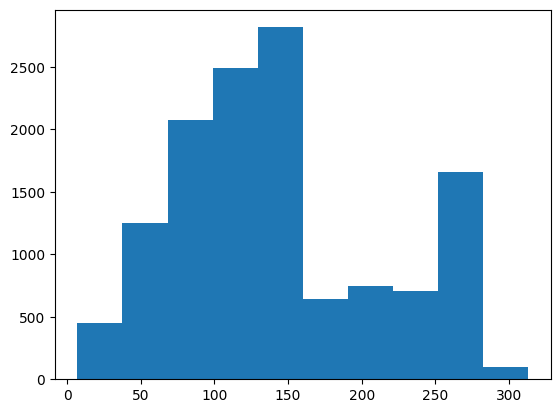

In [75]:
for text in train_char_text:
    plt_list.append(len(text))

plt.hist(plt_list)

In [76]:
char_length = 68

char_vector = layers.TextVectorization(max_tokens = char_length+2 , output_sequence_length=280 )

char_embed = layers.Embedding(char_length+2 , 128, mask_zero= True)

char_vector.adapt(train_char_text)

## Creating a convulation model using character token

In [36]:
inputs = layers.Input(shape = (1,), dtype = tf.string)
x = char_vector(inputs)
x = char_embed(x)


x = layers.Dense(100,activation = "tanh")(x)
x = layers.Conv1D(264, 5, 2, activation = "tanh")(x)

x = layers.GlobalMaxPool1D()(x)



x = layers.Dense(100,activation = "tanh")(x)
outputs = layers.Dense(1 , activation = "sigmoid")(x)

model_1 = tf.keras.Model(inputs, outputs)

model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 280)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 280, 128)          8960      
                                                                 
 dense_45 (Dense)            (None, 280, 100)          12900     
                                                                 
 conv1d_35 (Conv1D)          (None, 138, 264)          132264    
                                                                 
 global_max_pooling1d_8 (Glo  (None, 264)              0         
 balMaxPooling1D)                                          

In [37]:
model_1.compile(loss = "binary_crossentropy",
               optimizer = "adam",
               metrics = ["accuracy"])

model_1_history = model_1.fit(train_dataset_1, epochs = 10 , validation_data=val_dataset_1)

Epoch 1/10
167/167 [==============================] - 29s 166ms/step - loss: 0.6515 - accuracy: 0.6208 - val_loss: 0.5933 - val_accuracy: 0.6922
Epoch 2/10
167/167 [==============================] - 25s 153ms/step - loss: 0.5450 - accuracy: 0.7251 - val_loss: 0.5333 - val_accuracy: 0.7347
Epoch 3/10
167/167 [==============================] - 27s 161ms/step - loss: 0.4525 - accuracy: 0.7895 - val_loss: 0.5413 - val_accuracy: 0.7268
Epoch 4/10
167/167 [==============================] - 28s 169ms/step - loss: 0.3630 - accuracy: 0.8442 - val_loss: 0.6314 - val_accuracy: 0.6909
Epoch 5/10
167/167 [==============================] - 30s 183ms/step - loss: 0.2652 - accuracy: 0.8996 - val_loss: 0.7356 - val_accuracy: 0.6764
Epoch 6/10
167/167 [==============================] - 27s 163ms/step - loss: 0.2241 - accuracy: 0.9114 - val_loss: 1.1285 - val_accuracy: 0.6878
Epoch 7/10
167/167 [==============================] - 31s 183ms/step - loss: 0.3069 - accuracy: 0.8609 - val_loss: 0.8497 - val_ac

## Visualizing the model's performance

In [40]:
model_1_preds = model_1.predict(val_char_text)
model_1_preds = tf.round(model_1_preds)

model_1_results = calculate_resultsulate_resultsulate_resultsulate_results(model_1_preds, val_target)

model_1_results

72/72 [==============================] - 4s 50ms/step


{'accuracy': 49.69352014010508,
 'precision': 0.9092435055272563,
 'recall': 0.4969352014010508,
 'f1': 0.5897513063428701}

## Creating a Recurrent Neural Network using Character token

In [48]:
inputs = layers.Input(shape = (1, ) , dtype = tf.string)
x = char_vector(inputs)
x = char_embed(x)

x = layers.Dense(100, activation = "tanh")(x)
x = layers.Dense(500, activation = "tanh")(x)

x = layers.Bidirectional(layers.LSTM(264))(x)



x = layers.Dense(100, activation = "tanh")(x)

outputs = layers.Dense(1, activation = "sigmoid")(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 280)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 280, 128)          8960      
                                                                 
 dense_56 (Dense)            (None, 280, 100)          12900     
                                                                 
 dense_57 (Dense)            (None, 280, 500)          50500     
                                                                 
 bidirectional_5 (Bidirectio  (None, 528)              1615680   
 nal)                                                      

In [49]:
model_2.compile(loss = "binary_crossentropy",
               optimizer = "adam",
               metrics = ["accuracy"])

model_2_history = model_2.fit(train_dataset_1, epochs = 10 , validation_data=val_dataset_1)

Epoch 1/10
167/167 [==============================] - 9819s 59s/step - loss: 0.6516 - accuracy: 0.6239 - val_loss: 0.6497 - val_accuracy: 0.6156
Epoch 2/10
167/167 [==============================] - 1438s 9s/step - loss: 0.6462 - accuracy: 0.6322 - val_loss: 0.6333 - val_accuracy: 0.6401
Epoch 3/10
167/167 [==============================] - 1683s 10s/step - loss: 0.6351 - accuracy: 0.6500 - val_loss: 0.6596 - val_accuracy: 0.6116
Epoch 4/10
167/167 [==============================] - 2028s 12s/step - loss: 0.6392 - accuracy: 0.6356 - val_loss: 0.6328 - val_accuracy: 0.6410
Epoch 5/10
167/167 [==============================] - 5762s 35s/step - loss: 0.6405 - accuracy: 0.6315 - val_loss: 0.6348 - val_accuracy: 0.6445
Epoch 6/10
167/167 [==============================] - 1722s 10s/step - loss: 0.6238 - accuracy: 0.6583 - val_loss: 0.6303 - val_accuracy: 0.6462
Epoch 7/10
167/167 [==============================] - 3172s 19s/step - loss: 0.6244 - accuracy: 0.6551 - val_loss: 0.6317 - val_acc

## visualizing our model's performance

In [52]:
model_2_preds =  model_2.predict(val_char_text)
model_2_preds = tf.round(model_2_preds)

model_2_results = calculate_results(model_2_preds, val_target)

model_2_results

72/72 [==============================] - 256s 3s/step


{'accuracy': 65.19264448336253,
 'precision': 0.6991837510613002,
 'recall': 0.6519264448336253,
 'f1': 0.6654859452107369}

## Creating a Recurrent Neural Network model using text token

In [55]:
inputs = layers.Input(shape = (1, ) , dtype = tf.string)
x = char_vector(inputs)
x = char_embed(x)

x = layers.Dense(100, activation = "relu")(x)
x = layers.Dense(500, activation = "relu")(x)

x = layers.Bidirectional(layers.LSTM(128))(x)



x = layers.Dense(100, activation = "relu")(x)

outputs = layers.Dense(1, activation = "sigmoid")(x)

model_3 = tf.keras.Model(inputs, outputs)

model_3.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 280)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 280, 128)          8960      
                                                                 
 dense_64 (Dense)            (None, 280, 100)          12900     
                                                                 
 dense_65 (Dense)            (None, 280, 500)          50500     
                                                                 
 bidirectional_7 (Bidirectio  (None, 256)              644096    
 nal)                                                      

In [56]:
model_3.compile(loss = "binary_crossentropy",
               optimizer = "adam",
               metrics = ["accuracy"])

model_3_history = model_3.fit(train_dataset_0, epochs = 5 , validation_data=val_dataset_0)

Epoch 1/5
167/167 [==============================] - 392s 2s/step - loss: 0.6725 - accuracy: 0.5652 - val_loss: 0.6620 - val_accuracy: 0.5784
Epoch 2/5
167/167 [==============================] - 493s 3s/step - loss: 0.6642 - accuracy: 0.5676 - val_loss: 0.6659 - val_accuracy: 0.5705
Epoch 3/5
167/167 [==============================] - 481s 3s/step - loss: 0.6635 - accuracy: 0.5705 - val_loss: 0.6634 - val_accuracy: 0.5775
Epoch 4/5
167/167 [==============================] - 673s 4s/step - loss: 0.6604 - accuracy: 0.5744 - val_loss: 0.6635 - val_accuracy: 0.5863
Epoch 5/5
167/167 [==============================] - 466s 3s/step - loss: 0.6578 - accuracy: 0.5770 - val_loss: 0.6609 - val_accuracy: 0.5744


## Visualizing our model's performance

In [57]:
model_3_preds =  model_3.predict(val_dataset_0)
model_3_preds = tf.round(model_3_preds)

model_3_results = calculate_results(model_3_preds, val_target)

model_3_results

72/72 [==============================] - 59s 764ms/step


{'accuracy': 57.4430823117338,
 'precision': 0.5977839667274372,
 'recall': 0.574430823117338,
 'f1': 0.5738385051830046}

## Creating concatenate model (char text model + location model + keyboard model)

In [78]:
train_data = train_data.sample(frac = 1)

In [79]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 4042 to 5722
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 356.9+ KB


In [80]:
train_sent = train_data["text"][:6500]
train_keyword = train_data["keyword"][:6500]
train_location = train_data["location"][:6500]
train_target = train_data["target"][:6500]

val_sent = train_data["text"][6500:]
val_keyword = train_data["keyword"][6500:]
val_location = train_data["location"][6500:]
val_target = train_data["target"][6500:]

In [81]:
train_sent_text = [" ".join(list(text.lower())) for text in train_sent]
val_sent_text = [" ".join(list(text.lower())) for text in val_sent]
test_char_text = [" ".join(list(text.lower())) for text in test_text]


In [82]:
char_length = 68

char_vector = layers.TextVectorization(max_tokens = char_length+2 , output_sequence_length=280 )

char_embed = layers.Embedding(char_length+2 , 128, mask_zero= True)

char_vector.adapt(train_sent_text)

## Creating a dataset for our final model 

In [84]:
def transforms(c_data, keyword, location, target):
    x = tf.data.Dataset.from_tensor_slices((c_data ,keyword,location))
    y = tf.data.Dataset.from_tensor_slices(target)
    z = tf.data.Dataset.zip((x,y)).batch(32).prefetch(tf.data.AUTOTUNE)
    return z

In [85]:
positional_train_dataset = transforms(train_sent_text,
                                      train_keyword, 
                                      train_location,
                                      train_target)

positional_val_dataset = transforms(val_sent_text,
                                    val_keyword,
                                    val_location,
                                    val_target)



In [86]:
positional_train_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

### Creating model 5

In [87]:
# char text model

inputs = layers.Input(shape = (1, ) , dtype = tf.string)
char_vectorizer = char_vector(inputs)
char_embedding = char_embed(char_vectorizer)

x = layers.Dense(100, activation = "relu")(char_embedding)
x = layers.Dense(500, activation = "relu")(x)

x = layers.Bidirectional(layers.LSTM(128))(x)




outputs = layers.Dense(1, activation = "sigmoid")(x)

char_model = tf.keras.Model(inputs, outputs , name = "character_model")

# keyword model

inputs = layers.Input(shape = (1, ) , dtype = tf.string)
char_vectorizer = char_vector(inputs)
char_embedding = char_embed(char_vectorizer)

x = layers.Dense(100, activation = "relu")(char_embedding)
x = layers.Dense(500, activation = "relu")(x)

x = layers.Bidirectional(layers.LSTM(128))(x)




outputs = layers.Dense(1, activation = "sigmoid")(x)

keyword_model = tf.keras.Model(inputs, outputs , name = "keyword_model")

# location model 

inputs = layers.Input(shape = (1, ) , dtype = tf.string)
char_vectorizer = char_vector(inputs)
char_embedding = char_embed(char_vectorizer)

x = layers.Dense(100, activation = "relu")(char_embedding)
x = layers.Dense(500, activation = "relu")(x)

x = layers.Bidirectional(layers.LSTM(128))(x)




outputs = layers.Dense(1, activation = "sigmoid")(x)

location_model = tf.keras.Model(inputs, outputs , name = "location_model")

# concatenation of all the model

char_concat = layers.Concatenate()([ char_model.output, keyword_model.output, location_model.output])

# using some dropout

dropout_layers = layers.Dropout(0.5)(char_concat)



# final output layers

output_layer = layers.Dense(1 , activation = "sigmoid")(char_concat)

# final model 

model_5 = tf.keras.Model( [char_model.input, keyword_model.input,location_model.input], output_layer , name = "final_model")

model_5.summary()

Model: "final_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization_5 (TextVect  (None, 280)         0           ['input_1[0][0]',                
 orization)                                                       'input_2[0][0]',      

In [ ]:
model_5.compile(loss = "binary_crossentropy",
               optimizer = "adam",
               metrics = ["accuracy"])

model_5_history = model_5.fit(positional_train_dataset, epochs = 10 , validation_data=positional_val_dataset)

Epoch 1/10
204/204 [==============================] - 1257s 6s/step - loss: 0.6825 - accuracy: 0.5728 - val_loss: 0.6842 - val_accuracy: 0.5624
Epoch 2/10
204/204 [==============================] - 38565s 190s/step - loss: 0.6740 - accuracy: 0.5868 - val_loss: 0.6636 - val_accuracy: 0.5975
Epoch 3/10
204/204 [==============================] - 1161s 6s/step - loss: 0.6562 - accuracy: 0.6266 - val_loss: 0.6530 - val_accuracy: 0.6415
Epoch 4/10
204/204 [==============================] - 1198s 6s/step - loss: 0.6501 - accuracy: 0.6400 - val_loss: 0.6459 - val_accuracy: 0.6460
Epoch 5/10
198/204 [============================>.] - ETA: 1:26 - loss: 0.6303 - accuracy: 0.6776